Basic Queries
1. List all unique cities where customers are located.
2. Count the number of orders placed in 2017.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state. 

Intermediate Queries
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

Advanced Queries
1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.

### `mysql.connector` module is the official Python driver for MySQL, providing an interface to interact with MySQL databases.
### `.connect()` method is used to establish a connection to a MySQL database. It's part of the mysql.connector module in Python.
### mydb=`mysql.connector.connect("MySql Database")`
### A cursor is an object that allows you to iterate over the result set of a database query.
### mycursor = `mydb.cursor()` creates a cursor object.
### `mycursor.execute("SELECT * FROM customers")` executes the SQL query.
### myresult = `mycursor.fetchall()` fetches all rows from the result set.
### `.fetchall()` is a method used in Python's database connectors (like mysql.connector) to retrieve all rows of a query result set at once. It returns a list of tuples, where each tuple represents a row of data

In [9]:
# !pip install mysql-connector-python
import pandas as pd
import mysql.connector
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Connect to the MySQL database
conn = mysql.connector.connect(
    host='host name',
    user='user name',
    password='password',
    # The ecommerce batabase must be present inside ur MySql
    database='your databse name'
)
cursor = conn.cursor()

In [3]:
# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('order_items.csv', 'order_items'),
    ('sellers.csv', 'sales'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

In [4]:
# getting the datatypes of each column in the Table

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

In [5]:
# using python to dump(creating tables) data into MySql Using Python

for csv_file, table_name in csv_files:
    # file_path = os.path(csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)
    print("this is column\n",columns)
    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

this is column
 `customer_id` TEXT, `customer_unique_id` TEXT, `customer_zip_code_prefix` INT, `customer_city` TEXT, `customer_state` TEXT
Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

this is column
 `order_id` TEXT, `customer_id` TEXT, `order_status` TEXT, `order_purchase_timestamp` TEXT, `order_approved_at` TEXT, `order_delivered_carrier_date` TEXT, `order_delivered_customer_date` TEXT, `order_estimated_delivery_date` TEXT
Processing order_items.cs

## Basic Queries

### 1. List all unique cities where customers are located.

In [4]:
# 1
query= """select distinct(customer_city) from customers"""
cursor.execute(query)
data=cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### 2. Count the number of orders placed in 2017.


In [10]:
# 2
query=""" select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cursor.execute(query)
data=cursor.fetchall()
print("total orders placed in 2017 are:",data[0][0])

total orders placed in 2017 are: 45101


### 3. Find the total sales per category.


In [17]:
cursor.execute("""select upper(products.product_category) as category,
round(sum(payments.payment_value),2) as total_sales 
from products join order_items on
products.product_id=order_items.product_id
join payments on
payments.order_id=order_items.order_id
group by category""")
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


### 4. Calculate the percentage of orders that were paid in installments.


In [20]:
cursor.execute(""" select (sum(case when payment_installments >0 then 1 else 0 end
                )/count(*))*100 from payments""")
data=cursor.fetchall()
print("The Percentage of orders that were paid in installments is",data[0][0])

The Percentage of orders that were paid in installments is 99.9981


### 5. Count the number of customers from each state. 

In [29]:
cursor.execute("""select customer_state,count(customer_id) as customer_count from customers
group by customer_state
order by customer_count DESC""")
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["state","customer_count"])
df

,state,customer_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


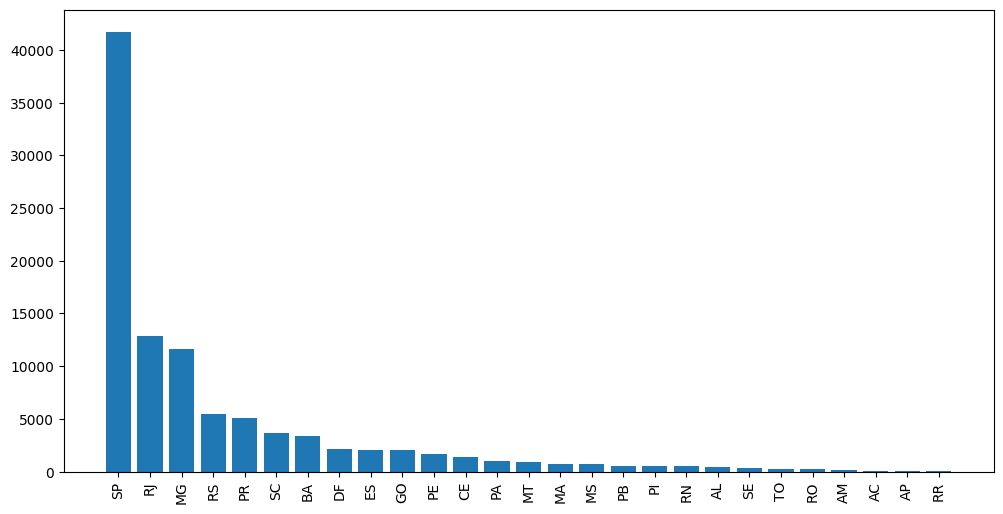

In [31]:
plt.figure(figsize=(12,6))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.show()

## Intermediate Queries

### 1. Calculate the number of orders per month in 2018.

In [54]:
cursor.execute("""SELECT MONTH(order_purchase_timestamp) AS month_no, MONTHNAME(order_purchase_timestamp) AS month_name, COUNT(order_id)
FROM orders
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp), month_name
ORDER BY month_no ASC;""")
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["month_no","month_name","order_count"])
df

,month_no,month_name,order_count
0,1,January,7269
1,2,February,6728
2,3,March,7211
3,4,April,6939
4,5,May,6873
5,6,June,6167
6,7,July,6292
7,8,August,6512
8,9,September,16
9,10,October,4


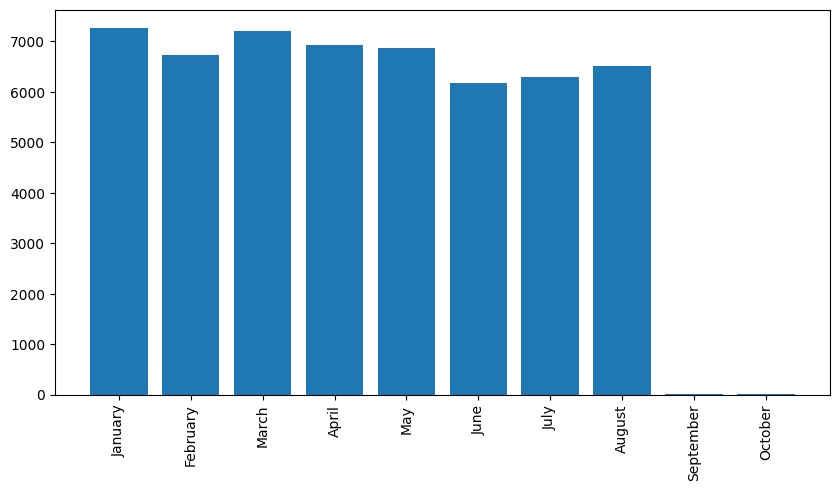

In [60]:
plt.figure(figsize=(10,5))
plt.bar(df["month_name"],df["order_count"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# A common table expression (CTE) is a named temporary result set that exists within the scope of a single statement and that can be referred to later within that statement, possibly multiple times. The following discussion describes how to write statements that use CTEs.
# To specify common table expressions, use a WITH clause that has one or more comma-separated subclauses. Each subclause provides a subquery that produces a result set, and associates a name with the subquery. 

### 2. Find the average number of products per order, grouped by customer city.

In [66]:
cursor.execute("""with count_per_order as (
  select 
    orders.order_id,
    orders.customer_id,
    count(order_items.order_id) as oc
  from 
    orders
  join 
    order_items
  on 
    orders.order_id = order_items.order_id
  group by 
    orders.order_id, 
    orders.customer_id
)
select customers.customer_city,round(avg(count_per_order.oc),2) as average_order_count
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city
order by average_order_count DESC
""")
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["customer_city","avg_order_count_per_order"])
df

,customer_city,avg_order_count_per_order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
...,...,...
4105,lagoa da canoa,1.00
4106,japaratuba,1.00
4107,sebastiao leal,1.00
4108,morro agudo de goias,1.00


### 3. Calculate the percentage of total revenue contributed by each product category.


In [72]:
cursor.execute("""select upper(products.product_category) as category,
round((sum(payments.payment_value)/(select sum(payment_value)from payments))*100,2) as percent_sales 
from products join order_items on
products.product_id=order_items.product_id
join payments on
payments.order_id=order_items.order_id
group by category
order by percent_sales DESC""")
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["Category","percent"])
df

,Category,percent
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


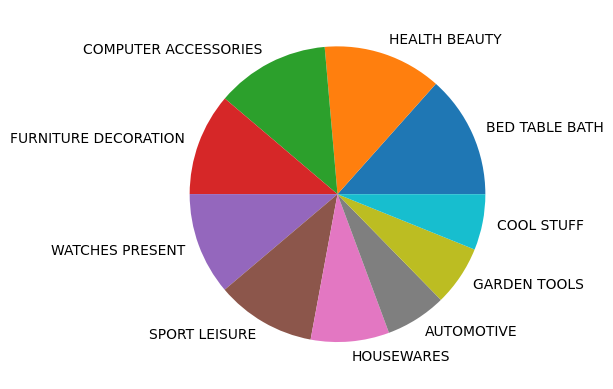

In [76]:
plt.pie(df["percent"][:10],labels=df["Category"][:10])
plt.show()

### 4. Identify the correlation between product price and the number of times a product has been purchased.


In [79]:
cursor.execute("""
select products.product_category, count(order_items.product_id) as product_order_count,round(avg(order_items.price),2) as price
from products join order_items 
on products.product_id=order_items.product_id
group by products.product_category
""")
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["category","product_order_count","product_price"])
df

,category,product_order_count,product_price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
...,...,...,...
69,flowers,33,33.64
70,Kitchen portable and food coach,15,264.57
71,House Comfort 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


In [86]:
df1=df.drop(columns=["category"],axis=1)
df1.corr()

,product_order_count,product_price
product_order_count,1.000000,-0.106315
product_price,-0.106315,1.000000


### 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [94]:
cursor.execute("""
select *,dense_rank() over(order by revenue desc) as rn 
from
(
select order_items.seller_id ,sum(payments.payment_value) as revenue
from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a

""")
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
df

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.209999,3082
3091,702835e4b785b67a084280efca355756,18.559999,3083
3092,4965a7002cca77301c82d3f91b82e1a9,16.360001,3084
3093,77128dec4bec4878c37ab7d6169d6f26,15.220000,3085


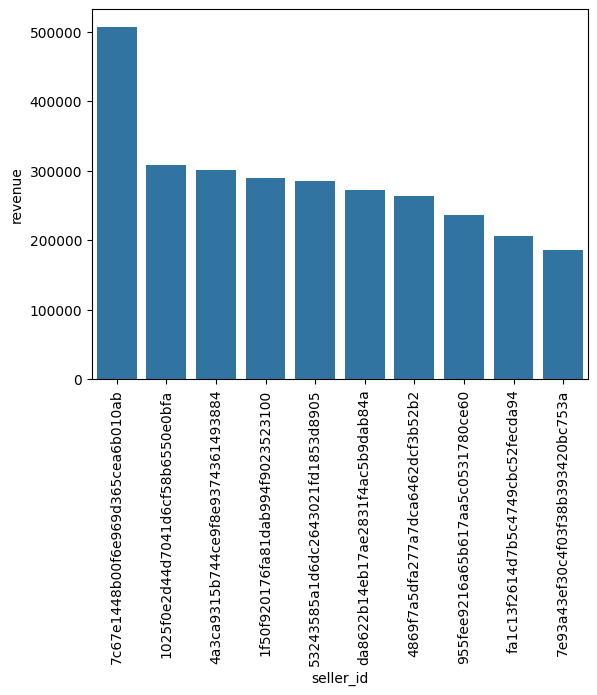

In [101]:
df1=df.head(10)
sns.barplot(data=df1,x="seller_id",y="revenue")
plt.xticks(rotation=90)
plt.show()

## Advance Queries

### Calculate the moving average of order values for each customer over their order history.

In [9]:
cursor.execute("""
select customer_id,order_purchase_timestamp,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(
select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id
) as a;

""")
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["custoer_id","order_purchase_timestamp","mov_avg"])
df

,custoer_id,order_purchase_timestamp,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.010002
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000


### 2. Calculate the cumulative sales per month for each year.

In [16]:
cursor.execute(
    """
select years,months, payment,
round(sum(payment) over(order by years,months),2) as cumulative_sales
from (
select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as month_no,
monthname(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from ecommerce.orders join ecommerce.payments
on orders.order_id = payments.order_id
group by years,month_no,months
order by years,month_no) as a 
    """
)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["year","month","payment","cumulative_sales"])
df

,year,month,payment,cumulative_sales
0,2016,December,19.62,19.62
1,2016,October,59090.48,59110.10
2,2016,September,252.24,59362.34
3,2017,April,417788.03,477150.37
4,2017,August,674396.32,1151546.69
5,2017,December,878401.48,2029948.17
6,2017,February,291908.01,2321856.18
7,2017,January,138488.04,2460344.22
8,2017,July,592382.92,3052727.14
9,2017,June,511276.38,3564003.52


In [17]:
# Create a datetime column for plotting
df['date'] = pd.to_datetime(df['month'] + ' ' + df['year'].astype(str), format='%B %Y')

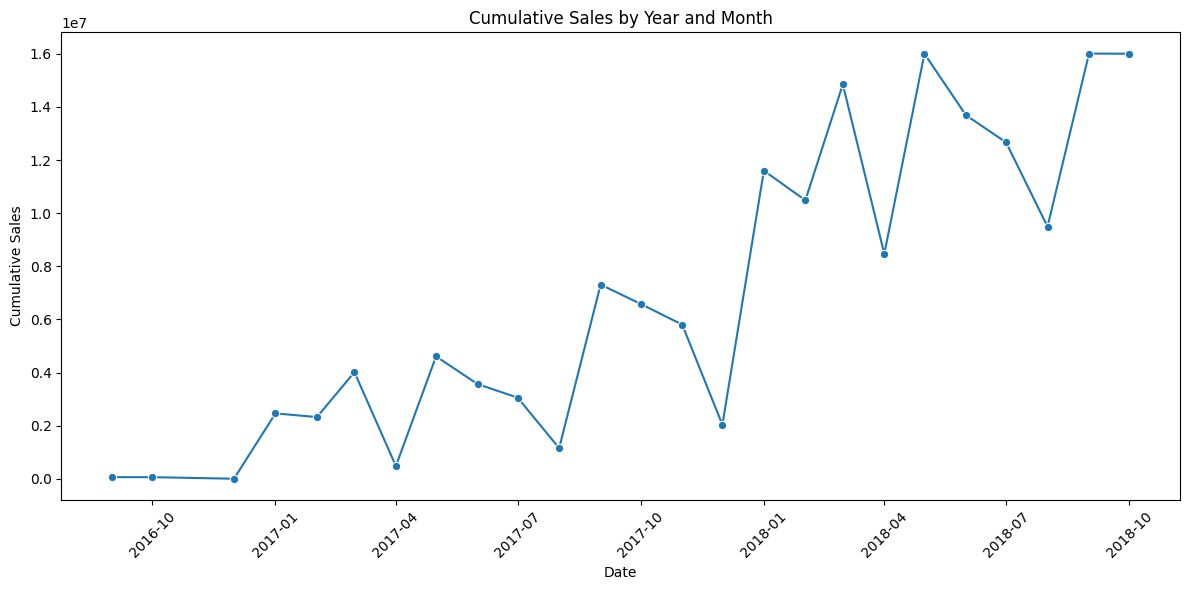

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='cumulative_sales', marker='o')
plt.title('Cumulative Sales by Year and Month')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Calculate the year-over-year growth rate of total sales.

#### YoY Growth Rate = [(Current Year Value - Previous Year Value) / Previous Year Value] * 100

In [33]:
cursor.execute(
    """
with a as 
(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from ecommerce.orders join ecommerce.payments
on orders.order_id = payments.order_id
group by years
order by years)
select years,
((payment - lag(payment,1) over(order by years)) / lag(payment,1) over(order by years))*100 
from a
    """
)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["year","YOY_%_growth"])
df

,year,YOY_%_growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


### 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

 Retention Rate = (Number of Customers at the End of the Period / Number of Customers at the Beginning of the Period) * 100

### let us first fetch the customers with more than 1 orders within 6 months from their first order

In [5]:
cursor.execute(
    """
with a as(
select customers.customer_id,
min(orders.order_purchase_timestamp) as first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id)

select a.customer_id,count(distinct orders.order_purchase_timestamp)
from a join orders
on a.customer_id=orders.customer_id
where orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order,interval 6 month)
group by a.customer_id
    """
)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["customer_id","no_of_order_within_6_month"])
df

,customer_id,no_of_order_within_6_month


## There are 0 customers who make another purchase within 6 months of their first purchase,so if we even calculate the retention rate it will give us nul.

#### if there were any customers then we would have calculated the retention rate using:

select  (count(distinct a.customer_id)/count(distinct b.customer_id))

from a left join b

on a.customer_id=b.customer_id;

### 5. Identify the top 3 customers who spent the most money in each year.

In [7]:
cursor.execute(
    """
select years,customer_id,payment,d_rank 
from
(select year(orders.order_purchase_timestamp) as years,
orders.customer_id,
sum(payments.payment_value) as payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) as d_rank
from orders join payments
on orders.order_id = payments.order_id
group by year(orders.order_purchase_timestamp), orders.customer_id ) as a
where d_rank <=3
    """
)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=["year","customer_id","payment","d_rank"])
df

,year,customer_id,payment,d_rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


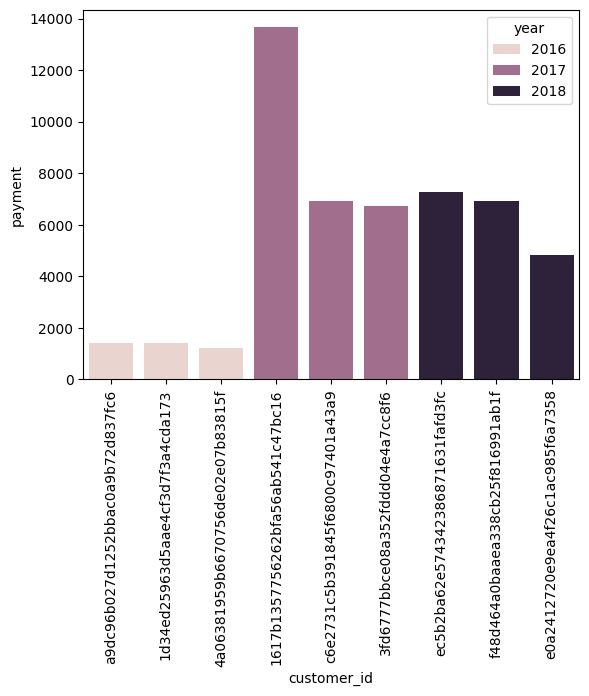

In [11]:
sns.barplot(x='customer_id',y='payment',data=df,hue='year')
plt.xticks(rotation=90)
plt.show()